In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df=pd.read_csv("ai4i2020.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
df.drop(["UDI"],axis=1,inplace=True)

In [8]:
df.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273
OSF,0.001988,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341


<AxesSubplot:>

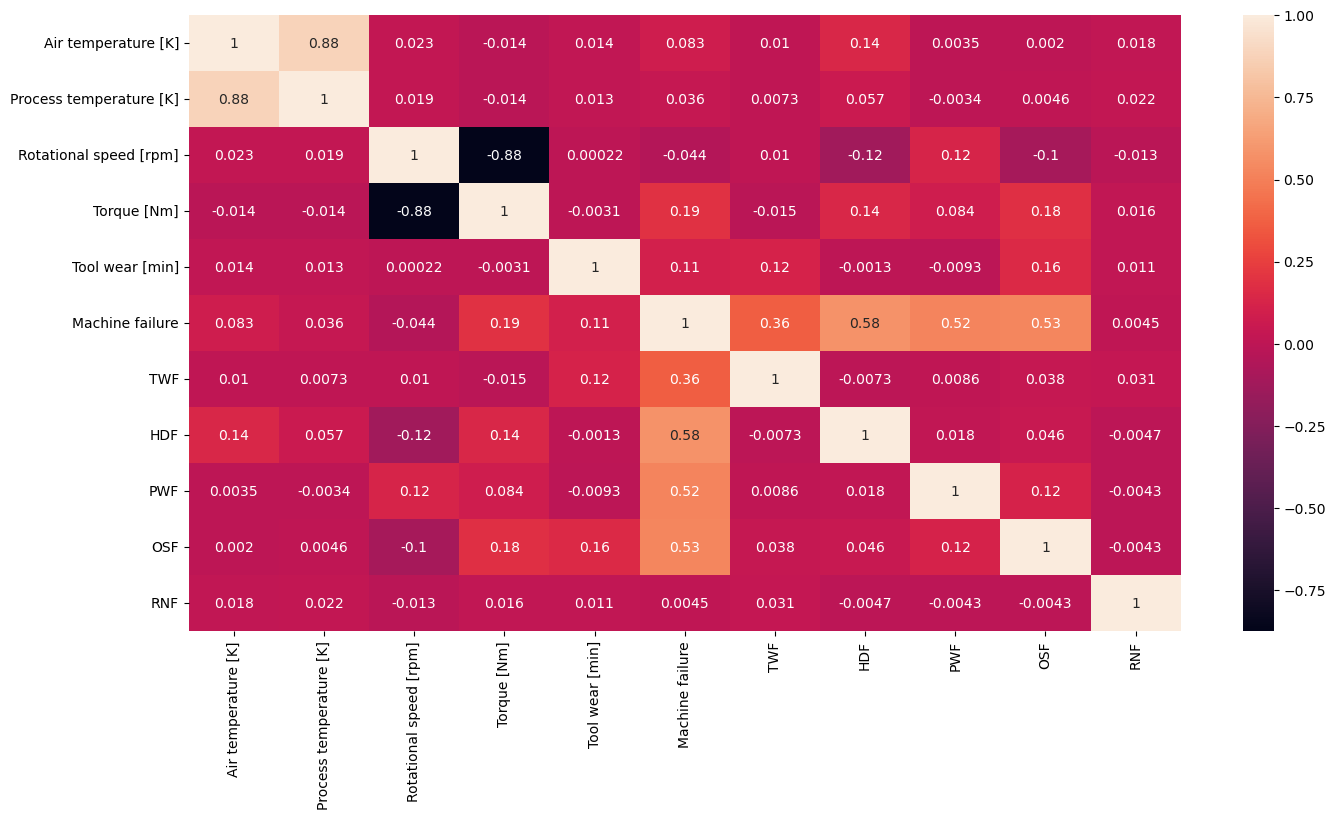

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [11]:
report=ProfileReport(df)

In [12]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
x1=df["Process temperature [K]"]
x1

0       308.6
1       308.7
2       308.5
3       308.6
4       308.7
        ...  
9995    308.4
9996    308.4
9997    308.6
9998    308.7
9999    308.7
Name: Process temperature [K], Length: 10000, dtype: float64

In [16]:
y=df["Air temperature [K]"]

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Air temperature [K]'>

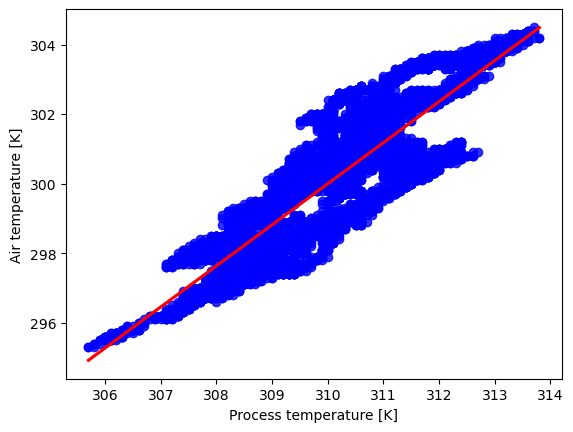

In [18]:
sns.regplot(x1,y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [19]:
x=df.drop(["Product ID","Type","Air temperature [K]"],axis=1)

In [20]:
y=df[["Air temperature [K]"]]

In [21]:
linear=LinearRegression()

In [22]:
linear.fit(x,y)

LinearRegression()

In [23]:
linear.score(x,y)

0.775666013666106

In [24]:
linear.coef_

array([[ 1.17376384e+00,  1.90233804e-04,  2.67890316e-04,
         8.45451276e-05, -9.00858666e-02,  2.01756471e-01,
         1.77926496e+00,  1.41970075e-01, -4.04797285e-02,
        -5.72344840e-02]])

In [25]:
linear.intercept_

array([-64.20013022])

In [28]:
x=df[["Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","TWF","HDF","PWF"]]
x.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],TWF,HDF,PWF
0,308.6,1551,42.8,0,0,0
1,308.7,1408,46.3,0,0,0
2,308.5,1498,49.4,0,0,0
3,308.6,1433,39.5,0,0,0
4,308.7,1408,40.0,0,0,0


In [29]:
lm=smf.ols(formula=(y,x),data=df)

In [30]:
re=lm.fit()

In [31]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Air temperature [K]   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          1.514e+08
Date:                 Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                         18:45:28   Log-Likelihood:                         -14140.
No. Observations:                10000   AIC:                                  2.829e+04
Df Residuals:                     9994   BIC:                                  2.834e+04
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Process temperature [K]     0.9701      0.001   1095.288      0.000       0.968       0.972
Rotational speed [rpm]     -0.0003      0.000     -2.099      0.036      -0.001   -1.73e-05
Torque [Nm]                -0.0085      0.002     -3.776      0.000      -0.013      -0.004
TWF                         0.1452      0.147      0.987      0.324      -0.143       0.434
HDF                         1.8721      0.094     19.850      0.000       1.687       2.057
PWF                         0.2133      0.113      1.894      0.058      -0.007       0.434
==============================================================================
Omnibus:                     2323.390   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.946
Skew:                           0.082   Prob(JB):                     4.35e-94
Kurtosis:                       1.998   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
x2=df["Process temperature [K]"].values
#this is 1d values
#if u dnt use values then those are present in 2d

In [33]:
x3=df.drop(["Product ID","Type","Air temperature [K]"],axis=1).values
x3

array([[ 308.6, 1551. ,   42.8, ...,    0. ,    0. ,    0. ],
       [ 308.7, 1408. ,   46.3, ...,    0. ,    0. ,    0. ],
       [ 308.5, 1498. ,   49.4, ...,    0. ,    0. ,    0. ],
       ...,
       [ 308.6, 1645. ,   33.4, ...,    0. ,    0. ,    0. ],
       [ 308.7, 1408. ,   48.5, ...,    0. ,    0. ,    0. ],
       [ 308.7, 1500. ,   40.2, ...,    0. ,    0. ,    0. ]])

In [34]:
y2=df["Air temperature [K]"].values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


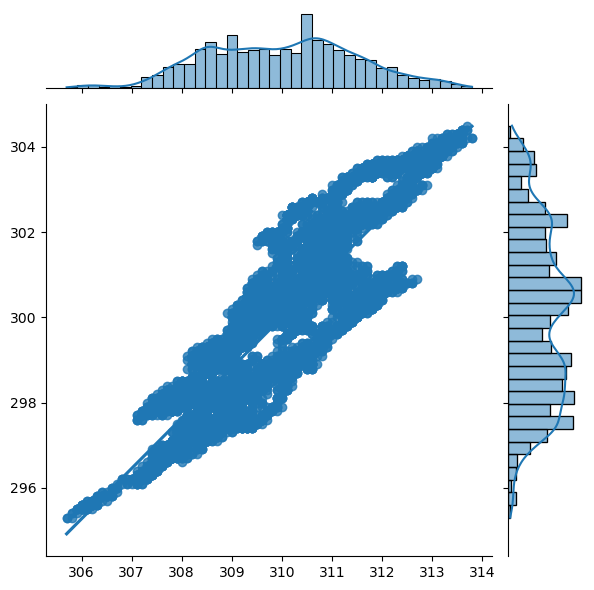

In [35]:
sns.jointplot(x2,y2,kind="reg")

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
linear=LinearRegression()
linear.fit(x_train,y=y_train)
linear.predict(x_train)
linear.score(x_train,y_train)

0.7690938999268547

In [37]:
linear.score(x_test,y_test)

0.7899755838453776

In [38]:
linear.predict([[308.6,1551,42.8,0,0,0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[298.34991585]])